<a href="https://colab.research.google.com/github/saonongjang/coding_excercise/blob/main/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 문자열 연산

In [1]:
# 문자열 연산자

import pandas as pd
import numpy as np

In [9]:
name_tuple = ['MK Baek', 'Steve J', 'Larry P', 'Elon M', None, 'Bill C', 'Mark J', 'Jeff B']
name_tuple

['MK Baek', 'Steve J', 'Larry P', 'Elon M', None, 'Bill C', 'Mark J', 'Jeff B']

In [10]:
# 시리즈로 만들기

names = pd.Series(name_tuple)
names

0    MK Baek
1    Steve J
2    Larry P
3     Elon M
4       None
5     Bill C
6     Mark J
7     Jeff B
dtype: object

In [11]:
# 모든 문자 소문자로 만들기

names.str.lower()

0    mk baek
1    steve j
2    larry p
3     elon m
4       None
5     bill c
6     mark j
7     jeff b
dtype: object

In [12]:
# 문자길이 구하기

names.str.len()

0    7.0
1    7.0
2    7.0
3    6.0
4    NaN
5    6.0
6    6.0
7    6.0
dtype: float64

In [14]:
names.str.split()

0    [MK, Baek]
1    [Steve, J]
2    [Larry, P]
3     [Elon, M]
4          None
5     [Bill, C]
6     [Mark, J]
7     [Jeff, B]
dtype: object

###기타 연산자

In [13]:
names.str[0:4]

0    MK B
1    Stev
2    Larr
3    Elon
4    None
5    Bill
6    Mark
7    Jeff
dtype: object

In [15]:
names.str.split().str.get(-1)

0    Baek
1       J
2       P
3       M
4    None
5       C
6       J
7       B
dtype: object

In [17]:
names.str.repeat(2)

0    MK BaekMK Baek
1    Steve JSteve J
2    Larry PLarry P
3      Elon MElon M
4              None
5      Bill CBill C
6      Mark JMark J
7      Jeff BJeff B
dtype: object

In [19]:
names.str.join('%')

0    M%K% %B%a%e%k
1    S%t%e%v%e% %J
2    L%a%r%r%y% %P
3      E%l%o%n% %M
4             None
5      B%i%l%l% %C
6      M%a%r%k% %J
7      J%e%f%f% %B
dtype: object

### 정규표현식

In [20]:
#해당 범위내의 알파벳인가를 검증

names.str.match('([A-Za-z]+)')

0    True
1    True
2    True
3    True
4    None
5    True
6    True
7    True
dtype: object

In [21]:
names.str.findall('([A-Za-z]+)')

0    [MK, Baek]
1    [Steve, J]
2    [Larry, P]
3     [Elon, M]
4          None
5     [Bill, C]
6     [Mark, J]
7     [Jeff, B]
dtype: object

### 시계열 처리

In [23]:
idx = pd.DatetimeIndex(['2019-01-01','2020-01-01','2020-02-01','2020-02-02','2020-03-01'])
s = pd.Series([0,1,2,3,4], index=idx)
s

2019-01-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [24]:
#날짜 기준으로 슬라이싱 하기

s['2020-01-01':]

2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [25]:
s[:'2020-01-01'] # 지정된 날짜를 포함하여 이전 날짜까지의 데이터

2019-01-01    0
2020-01-01    1
dtype: int64

In [26]:
#특정 연도만 보여주기

s['2019']

2019-01-01    0
dtype: int64

### 시계열 데이터 구조

In [31]:
from datetime import datetime
dates = pd.to_datetime(['12-12-2019', datetime(2020,1,1), '2nd of Feb, 2020', '2020-Mar-4', '20200701']) #어떤 형태이든 날짜 인식
dates

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
               '2020-07-01'],
              dtype='datetime64[ns]', freq=None)

In [32]:
dates.to_period('D')

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
             '2020-07-01'],
            dtype='period[D]')

In [34]:
# 각 날짜별 기간 구하기

dates - dates[0]

TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)

In [35]:
pd.date_range('2021-09-23','2022-03-18')

DatetimeIndex(['2021-09-23', '2021-09-24', '2021-09-25', '2021-09-26',
               '2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30',
               '2021-10-01', '2021-10-02',
               ...
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12',
               '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18'],
              dtype='datetime64[ns]', length=177, freq='D')

In [36]:
pd.date_range('2020-01-01', periods=8)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08'],
              dtype='datetime64[ns]', freq='D')

In [37]:
# freq를 D(일단위)에서 M(월단위)로 변경

pd.date_range('2020-01-03',periods=8,freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31'],
              dtype='datetime64[ns]', freq='M')

In [40]:
# NaT : 시간데이터가 없을 경우에는 이렇게 표시됨

idx = pd.to_datetime(['2020-01-01 12:00:00', '2020-01-02 00:00:00'] + [None])
idx

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [41]:
pd.isnull(idx)

array([False, False,  True])

### 시계열 기본

In [43]:
dates = [datetime(2020,1,1),datetime(2020,1,2),datetime(2020,1,1),datetime(2020,1,3),datetime(2020,1,5),datetime(2020,1,7),datetime(2020,1,10),]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 3, 0, 0),
 datetime.datetime(2020, 1, 5, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0)]

In [46]:
ts = pd.Series(np.random.randn(7), index = dates)
ts

2020-01-01    1.133191
2020-01-02    1.203025
2020-01-01    0.833760
2020-01-03   -0.211681
2020-01-05   -0.770560
2020-01-07   -0.120511
2020-01-10   -0.873575
dtype: float64

In [47]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-01', '2020-01-03',
               '2020-01-05', '2020-01-07', '2020-01-10'],
              dtype='datetime64[ns]', freq=None)

In [48]:
ts.index[0]

Timestamp('2020-01-01 00:00:00')

In [49]:
ts[ts.index[2]]

2020-01-01    1.133191
2020-01-01    0.833760
dtype: float64

In [50]:
ts['20200107']

2020-01-07   -0.120511
dtype: float64

In [52]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('2017-10-01', periods=1000))
ts

2017-10-01   -0.784691
2017-10-02   -1.766684
2017-10-03    0.260482
2017-10-04   -0.994460
2017-10-05    0.540068
                ...   
2020-06-22   -0.073995
2020-06-23    2.026306
2020-06-24    0.495331
2020-06-25   -2.390961
2020-06-26    0.813989
Freq: D, Length: 1000, dtype: float64

In [53]:
ts['2020']

2020-01-01    1.374232
2020-01-02    0.977811
2020-01-03   -0.978731
2020-01-04    0.138510
2020-01-05   -1.291620
                ...   
2020-06-22   -0.073995
2020-06-23    2.026306
2020-06-24    0.495331
2020-06-25   -2.390961
2020-06-26    0.813989
Freq: D, Length: 178, dtype: float64

In [64]:
ts['2020-06']

2020-06-01    0.177103
2020-06-02    0.001910
2020-06-03   -0.083663
2020-06-04   -0.253246
2020-06-05    0.057855
2020-06-06    2.981472
2020-06-07    0.038415
2020-06-08   -0.919339
2020-06-09    1.616831
2020-06-10   -1.020557
2020-06-11   -2.202855
2020-06-12    1.618114
2020-06-13   -0.802873
2020-06-14    0.655882
2020-06-15    1.697815
2020-06-16    0.397130
2020-06-17    0.146338
2020-06-18   -1.268572
2020-06-19    0.188724
2020-06-20    1.500831
2020-06-21   -0.664263
2020-06-22   -0.073995
2020-06-23    2.026306
2020-06-24    0.495331
2020-06-25   -2.390961
2020-06-26    0.813989
Freq: D, dtype: float64

In [66]:
ts[datetime(2020,6,10):]

2020-06-10   -1.020557
2020-06-11   -2.202855
2020-06-12    1.618114
2020-06-13   -0.802873
2020-06-14    0.655882
2020-06-15    1.697815
2020-06-16    0.397130
2020-06-17    0.146338
2020-06-18   -1.268572
2020-06-19    0.188724
2020-06-20    1.500831
2020-06-21   -0.664263
2020-06-22   -0.073995
2020-06-23    2.026306
2020-06-24    0.495331
2020-06-25   -2.390961
2020-06-26    0.813989
Freq: D, dtype: float64

In [69]:
tdf = pd.DataFrame(np.random.randn(1000,4), index=pd.date_range('2017-07-01', periods =1000), columns=['A','B','C','D'])
tdf

,A,B,C,D
2017-07-01,0.539818,-1.717789,-0.679615,0.316719
2017-07-02,-0.233054,-1.382808,-0.203859,2.249995
2017-07-03,-0.027882,1.093205,-0.622489,1.200007
2017-07-04,-0.170307,-2.277125,-0.453351,-2.179183
2017-07-05,1.901008,0.684108,-0.652360,0.227254
...,...,...,...,...
2020-03-22,0.436076,0.434292,0.372593,-0.393777
2020-03-23,-0.128762,1.042833,-1.459176,0.560179
2020-03-24,-1.945696,0.716916,-0.499074,-1.230501
2020-03-25,-0.198953,-1.531439,0.628015,-1.359613


In [70]:
tdf['2020']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,A,B,C,D
2020-01-01,-0.284703,-0.261559,-1.432460,0.527343
2020-01-02,-0.468613,2.264309,-1.157420,0.050303
2020-01-03,1.909287,1.265467,-0.575183,-0.183301
2020-01-04,-0.287196,0.162098,0.859814,1.299314
2020-01-05,-1.753899,-1.630712,-1.804881,0.487540
...,...,...,...,...
2020-03-22,0.436076,0.434292,0.372593,-0.393777
2020-03-23,-0.128762,1.042833,-1.459176,0.560179
2020-03-24,-1.945696,0.716916,-0.499074,-1.230501
2020-03-25,-0.198953,-1.531439,0.628015,-1.359613


In [72]:
tdf['2019-06']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,A,B,C,D
2019-06-01,0.235349,-1.167467,0.356674,0.029502
2019-06-02,-1.183683,-0.611880,-2.674328,0.010336
2019-06-03,2.193596,-0.241233,0.121762,-0.114457
2019-06-04,0.735286,-1.625062,0.524003,-1.130599
2019-06-05,-0.382019,-1.544836,0.266286,0.868250
2019-06-06,0.911278,-0.001402,-0.464005,0.562613
2019-06-07,-1.107324,0.724490,0.354879,1.693234
2019-06-08,0.176569,1.043435,-0.257807,-0.734909
2019-06-09,0.494735,-1.684280,-0.514780,0.470972
2019-06-10,1.955008,-0.580000,-0.731282,0.725584


In [73]:
tdf['C']

2017-07-01   -0.679615
2017-07-02   -0.203859
2017-07-03   -0.622489
2017-07-04   -0.453351
2017-07-05   -0.652360
                ...   
2020-03-22    0.372593
2020-03-23   -1.459176
2020-03-24   -0.499074
2020-03-25    0.628015
2020-03-26   -1.178223
Freq: D, Name: C, Length: 1000, dtype: float64

In [78]:
ts1 = pd.Series(np.random.randn(10), index = pd.DatetimeIndex(['2020-01-01','2020-01-01','2020-01-02','2020-01-02','2020-01-03',
                                                               '2020-01-04','2020-01-05','2020-01-05','2020-01-06','2020-01-07']))
ts1

2020-01-01   -0.702693
2020-01-01    1.705879
2020-01-02    0.081640
2020-01-02    0.831884
2020-01-03    1.341748
2020-01-04    1.045384
2020-01-05    0.311311
2020-01-05    0.864747
2020-01-06   -1.380945
2020-01-07   -0.156984
dtype: float64

In [82]:
# 중복상황의 점검

ts1.index.is_unique

False

In [83]:
ts1['2020-01-01']

2020-01-01   -0.702693
2020-01-01    1.705879
dtype: float64

In [84]:
# 같은 날짜의 값는 평균갑으로 대체하여 합침

ts1.groupby(level=0).mean()

2020-01-01    0.501593
2020-01-02    0.456762
2020-01-03    1.341748
2020-01-04    1.045384
2020-01-05    0.588029
2020-01-06   -1.380945
2020-01-07   -0.156984
dtype: float64

In [85]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [86]:
pd.date_range(start='2020-01-01', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [90]:
pd.date_range(end='2020-01-01', periods=10)


DatetimeIndex(['2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', freq='D')

In [91]:
# 영업일(Business day)만 추출하기

pd.date_range('2020-01-01','20200201', freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31'],
              dtype='datetime64[ns]', freq='B')

### 주기와 오프셋

In [97]:
# 시간단위의 인덱스 추출

pd.timedelta_range(0, periods=12, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [100]:
pd.timedelta_range(0, periods=10, freq='1H30T')


TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

### Shift

In [3]:
ts2 = pd.Series(np.random.randn(5),
                index=pd.date_range('2020-01-01',periods=5, freq='B'))
ts2

2020-01-01   -1.403164
2020-01-02   -2.008055
2020-01-03   -0.872971
2020-01-06   -0.905406
2020-01-07    1.800007
Freq: B, dtype: float64

In [105]:
ts2.shift(1)

2020-01-01         NaN
2020-01-02    0.895225
2020-01-03    0.061482
2020-01-06   -0.339773
2020-01-07    0.508326
Freq: B, dtype: float64

In [106]:
ts2.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06    0.895225
2020-01-07    0.061482
Freq: B, dtype: float64

In [4]:
ts2.shift(-2)

2020-01-01   -0.872971
2020-01-02   -0.905406
2020-01-03    1.800007
2020-01-06         NaN
2020-01-07         NaN
Freq: B, dtype: float64

### 시간대 처리

In [5]:
import pytz

In [8]:
pytz.common_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Tripoli',
 'Africa/Tunis',
 'Africa/Wi

In [10]:
tz = pytz.timezone('Asia/Seoul')

In [14]:
dinx = pd.date_range('2020-01-01 09:00', periods=7, freq='B')
ts = pd.Series(np.random.randn(len(dinx)), index=dinx)
ts

2020-01-01 09:00:00   -1.648833
2020-01-02 09:00:00    2.698254
2020-01-03 09:00:00    1.258854
2020-01-06 09:00:00   -0.343873
2020-01-07 09:00:00    0.770746
2020-01-08 09:00:00    0.021993
2020-01-09 09:00:00    0.588939
Freq: B, dtype: float64

In [17]:
pd.date_range('2020-01-01 09:00', periods=7, freq='B', tz='UTC')


DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [18]:
ts_utc =ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00   -1.648833
2020-01-02 09:00:00+00:00    2.698254
2020-01-03 09:00:00+00:00    1.258854
2020-01-06 09:00:00+00:00   -0.343873
2020-01-07 09:00:00+00:00    0.770746
2020-01-08 09:00:00+00:00    0.021993
2020-01-09 09:00:00+00:00    0.588939
Freq: B, dtype: float64

In [19]:
ts_utc.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [20]:
ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00   -1.648833
2020-01-02 18:00:00+09:00    2.698254
2020-01-03 18:00:00+09:00    1.258854
2020-01-06 18:00:00+09:00   -0.343873
2020-01-07 18:00:00+09:00    0.770746
2020-01-08 18:00:00+09:00    0.021993
2020-01-09 18:00:00+09:00    0.588939
Freq: B, dtype: float64

In [21]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

2020-01-01 09:00:00+09:00   -1.648833
2020-01-02 09:00:00+09:00    2.698254
2020-01-03 09:00:00+09:00    1.258854
2020-01-06 09:00:00+09:00   -0.343873
2020-01-07 09:00:00+09:00    0.770746
2020-01-08 09:00:00+09:00    0.021993
2020-01-09 09:00:00+09:00    0.588939
dtype: float64

In [23]:
stamp =pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [24]:
stamp_utc.value

1577880000000000000

In [25]:
stamp_utc.tz_convert('Asia/Seoul')


Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [27]:
stamp_utc.tz_convert('Asia/Seoul').value


1577880000000000000

### 기간과 기간연산

In [28]:
p = pd.Period(2020,freq= 'A-JAN')
p

Period('2020', 'A-JAN')

In [29]:
p+2

Period('2022', 'A-JAN')

In [31]:
p-3

Period('2017', 'A-JAN')

In [32]:
p1 = pd.Period(2010,freq= 'A-JAN')
p2 = pd.Period(2020,freq= 'A-JAN')
p2-p1


<10 * YearEnds: month=1>

In [33]:
pr =pd.period_range('2020-01-01','2020-06-30', freq='M')
pd.Series(np.random.randn(6), index=pr)

2020-01   -1.876068
2020-02   -0.055919
2020-03   -0.786974
2020-04   -0.951883
2020-05   -0.487244
2020-06    1.102840
Freq: M, dtype: float64

### Resampling

In [34]:
dr = pd.date_range('2020-01-01',periods=200, freq='D')
ts = pd.Series(np.random.randn(len(dr)), index=dr)
ts

2020-01-01   -1.143346
2020-01-02   -0.345990
2020-01-03    0.114417
2020-01-04   -0.178997
2020-01-05    0.466134
                ...   
2020-07-14   -1.127681
2020-07-15   -0.135072
2020-07-16   -1.058696
2020-07-17    0.547304
2020-07-18   -1.402219
Freq: D, Length: 200, dtype: float64

In [35]:
ts.resample('M').mean()

2020-01-31   -0.033872
2020-02-29    0.017829
2020-03-31    0.403333
2020-04-30    0.065661
2020-05-31    0.039633
2020-06-30   -0.100547
2020-07-31   -0.014171
Freq: M, dtype: float64

In [36]:
ts.resample('M', kind='period').mean()

2020-01   -0.033872
2020-02    0.017829
2020-03    0.403333
2020-04    0.065661
2020-05    0.039633
2020-06   -0.100547
2020-07   -0.014171
Freq: M, dtype: float64

In [39]:
dr = pd.date_range('2020-01-01',periods=10, freq='T')
ts = pd.Series(np.arange(len(dr)), index=dr)
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int64

In [40]:
ts.resample('2T', closed='left').sum()

2020-01-01 00:00:00     1
2020-01-01 00:02:00     5
2020-01-01 00:04:00     9
2020-01-01 00:06:00    13
2020-01-01 00:08:00    17
Freq: 2T, dtype: int64

In [41]:
ts.resample('2T', closed='right').sum()


2019-12-31 23:58:00     0
2020-01-01 00:00:00     3
2020-01-01 00:02:00     7
2020-01-01 00:04:00    11
2020-01-01 00:06:00    15
2020-01-01 00:08:00     9
Freq: 2T, dtype: int64

In [42]:
ts.resample('2T', closed='right', label='right').sum()


2020-01-01 00:00:00     0
2020-01-01 00:02:00     3
2020-01-01 00:04:00     7
2020-01-01 00:06:00    11
2020-01-01 00:08:00    15
2020-01-01 00:10:00     9
Freq: 2T, dtype: int64

In [47]:
ts.resample('2T', closed='right', label='right', loffset ='-1s').sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  """Entry point for launching an IPython kernel.


2019-12-31 23:59:59     0
2020-01-01 00:01:59     3
2020-01-01 00:03:59     7
2020-01-01 00:05:59    11
2020-01-01 00:07:59    15
2020-01-01 00:09:59     9
Freq: 2T, dtype: int64

In [48]:
ts.resample('2T').ohlc()  # 시고저종

,open,high,low,close
2020-01-01 00:00:00,0,1,0,1
2020-01-01 00:02:00,2,3,2,3
2020-01-01 00:04:00,4,5,4,5
2020-01-01 00:06:00,6,7,6,7
2020-01-01 00:08:00,8,9,8,9


In [49]:
df = pd.DataFrame(np.random.randn(10,4), index = pd.date_range('2020-01-01', periods=10, freq='M'), columns = ['C1','C2','C3','C4'])
df

,C1,C2,C3,C4
2020-01-31,-1.619238,1.125436,-0.394200,-0.250186
2020-02-29,0.337359,-0.396276,-0.411286,0.021802
2020-03-31,-0.061370,-0.236959,-1.095150,0.533032
2020-04-30,1.874535,1.615032,1.480859,1.527098
2020-05-31,0.513731,-0.592825,1.415916,-0.067840
2020-06-30,0.249831,-0.063527,-3.233978,0.878849
2020-07-31,-0.535861,0.563414,0.257972,-0.233991
2020-08-31,-0.149534,1.334253,-0.906160,-0.061539
2020-09-30,-0.726811,0.379653,-1.504845,-0.045724
2020-10-31,0.234086,-0.261081,-0.167812,1.570177


In [50]:
df.resample('Y').asfreq() #연도기준으로 리샘플링

,C1,C2,C3,C4
2020-12-31,NaN,NaN,NaN,NaN


In [51]:
df.resample('W').asfreq() #주단위로으로 리샘플링


,C1,C2,C3,C4
2020-02-02,NaN,NaN,NaN,NaN
2020-02-09,NaN,NaN,NaN,NaN
2020-02-16,NaN,NaN,NaN,NaN
2020-02-23,NaN,NaN,NaN,NaN
2020-03-01,NaN,NaN,NaN,NaN
2020-03-08,NaN,NaN,NaN,NaN
2020-03-15,NaN,NaN,NaN,NaN
2020-03-22,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN
2020-04-05,NaN,NaN,NaN,NaN


In [52]:
df.resample('W').ffill()

,C1,C2,C3,C4
2020-02-02,-1.619238,1.125436,-0.394200,-0.250186
2020-02-09,-1.619238,1.125436,-0.394200,-0.250186
2020-02-16,-1.619238,1.125436,-0.394200,-0.250186
2020-02-23,-1.619238,1.125436,-0.394200,-0.250186
2020-03-01,0.337359,-0.396276,-0.411286,0.021802
2020-03-08,0.337359,-0.396276,-0.411286,0.021802
2020-03-15,0.337359,-0.396276,-0.411286,0.021802
2020-03-22,0.337359,-0.396276,-0.411286,0.021802
2020-03-29,0.337359,-0.396276,-0.411286,0.021802
2020-04-05,-0.061370,-0.236959,-1.095150,0.533032


In [53]:
df.resample('Q-DEC').mean()

,C1,C2,C3,C4
2020-03-31,-0.447750,0.164067,-0.633546,0.101549
2020-06-30,0.879366,0.319560,-0.112401,0.779369
2020-09-30,-0.470735,0.759107,-0.717678,-0.113751
2020-12-31,0.234086,-0.261081,-0.167812,1.570177


In [54]:
df.resample('Y').mean()


,C1,C2,C3,C4
2020-12-31,0.011673,0.346712,-0.455868,0.387168


### Moving Window

In [55]:
df= pd.DataFrame(np.random.randn(300,4),
                 index = pd.date_range('2020-01-01', periods=300, freq='D'),
                 columns=['C1','C2', 'C3','C4'])
df

,C1,C2,C3,C4
2020-01-01,-0.817637,-2.358957,-0.338174,-0.697827
2020-01-02,0.904433,-1.766801,0.838128,1.424882
2020-01-03,0.127489,-0.178304,0.707315,-0.771655
2020-01-04,1.534994,-0.998655,-0.716960,0.772062
2020-01-05,-0.486318,-1.424949,0.225737,-0.603497
...,...,...,...,...
2020-10-22,1.454743,1.484292,0.313572,-2.427514
2020-10-23,-0.908041,-0.216414,0.007822,0.652702
2020-10-24,0.545233,2.546690,0.009643,-0.580047
2020-10-25,-1.723479,0.993416,0.602787,0.805306


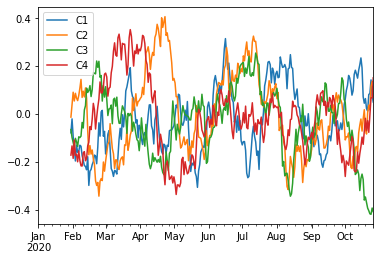

In [56]:
#30일 이동평균을 그림으로 보기
df.rolling(30).mean().plot()

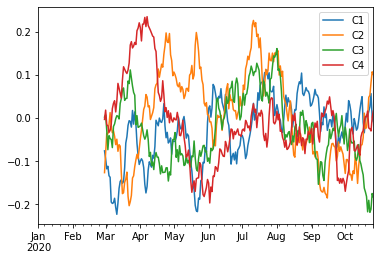

In [57]:
df.rolling(60).mean().plot()


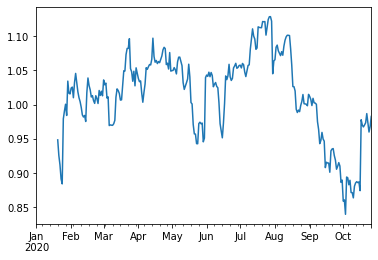

In [59]:
#특정 칼럼만 보고자 할 경우
df.C1.rolling(60, min_periods=20).std().plot()

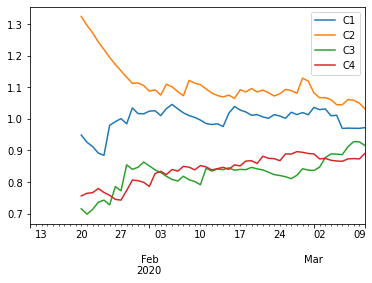

In [60]:
# 일부분만 보고자 할 경우 (10-70)
df.rolling(60, min_periods=20).std()[10:70].plot()


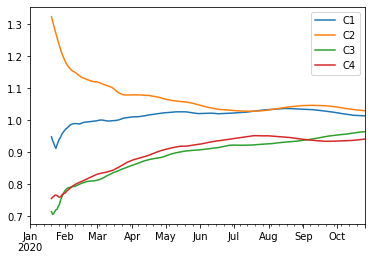

In [61]:
df.rolling(60, min_periods=20).std().expanding().mean().plot()


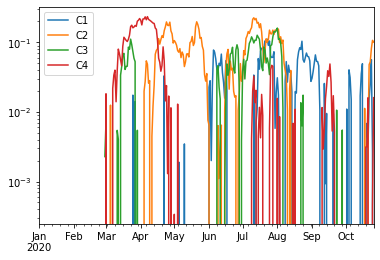

In [62]:
df.rolling(60).mean().plot(logy=True)


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:271: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  conv.to_rgba(color)


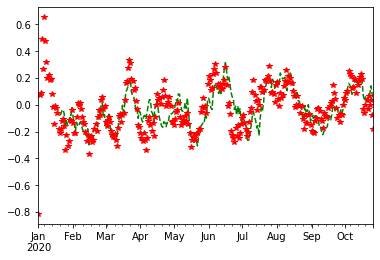

In [67]:
from pandas.io.formats import style
df.C1.rolling(30,min_periods=20).mean().plot(style='--', label='Simple MA',color='G')
df.C1.ewm(span=30).mean().plot(style='*', label='EWA',color='R')

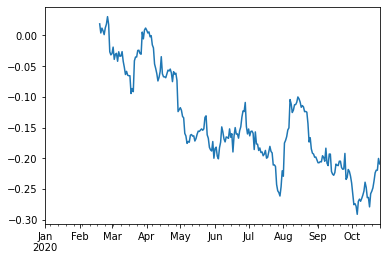

In [69]:
# Column간 상관관계의 분석

df.C1.rolling(100, min_periods=50).corr(df.C3).plot()

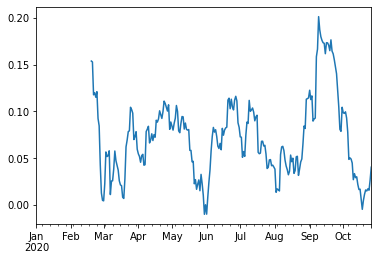

In [70]:
df.C3.rolling(100, min_periods=50).corr(df.C4).plot()
